In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import tensorflow as tf
import keras
from keras import datasets

In [2]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
objects = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [6]:
def image_displayer(x,y,index):
    plt.imshow(x[index])
    plt.xlabel(objects[y[index]])
    

In [7]:
#y_train = y_train.reshape(-1,)
#y_test = y_test.reshape(-1,)

In [8]:
x_train = x_train/255.0
x_test = x_test/255.0

In [9]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.models import Sequential
from keras.layers import Flatten,Dense
from keras.losses import sparse_categorical_crossentropy

In [10]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation = 'relu',input_shape = (32,32,3)))

In [11]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
model.add(Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu'))

In [13]:
model.add(Flatten())
model.add(Dense(units = 64,activation='relu'))
model.add(Dense(units = 10,activation = 'softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [15]:
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.4228 - accuracy: 0.4857 - val_loss: 1.1598 - val_accuracy: 0.5856
Epoch 2/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.0901 - accuracy: 0.6149 - val_loss: 1.0634 - val_accuracy: 0.6232
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9346 - accuracy: 0.6725 - val_loss: 0.9621 - val_accuracy: 0.6616
Epoch 4/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8433 - accuracy: 0.7044 - val_loss: 0.8690 - val_accuracy: 0.7031
Epoch 5/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.7657 - accuracy: 0.7318 - val_loss: 0.8641 - val_accuracy: 0.7023
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7106 - accuracy: 0.7490 - val_loss: 0.8557 - val_accuracy: 0.7029
Epoch 7/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.6564 - accuracy: 0.7691 - val_loss: 0.8473 -

In [18]:
y_pred = model.predict(x_test)

313/313 [==============================] - 5s 14ms/step


In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score

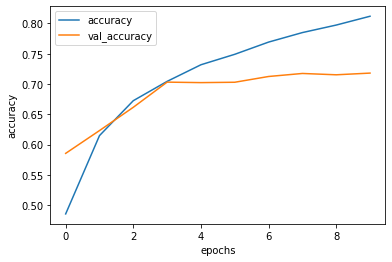

In [30]:
plt.plot(history.history['accuracy'],label = 'accuracy')
#plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()